In [1]:
import math
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from server_pull import *
import random

In [2]:
#Initialize Variables
N = 1000      # the time (or round) - 1 million
d = 24                   # number of possible variables
# Qt_a = 0
Nt_a = np.zeros(d)      #number of times arm a has been selected prior to T
#                         #If Nt(a) = 0, then a is considered to be a maximizing action.
# c = 1                   
sum_rewards = np.zeros(d) 

hist_t = [] #holds the natural log of each round
hist_achieved_rewards = [] #holds the history of the UCB CHOSEN cumulative rewards
hist_arm_selected = []     #holds the history of the arm selected for each time
hist_best_possible_rewards = [] #holds the history of OPTIMAL cumulative rewards
hist_random_choice_rewards = [] #holds the history of RANDONMLY selected actions rewards

In [3]:
def number_of_certain_prob(seq, prob):
    x = random.uniform(0, 1)
    cumulative_prob = 0.0
    for item, item_prob in zip(seq, prob):
        cumulative_prob += item_prob
        if x < cumulative_prob:
            break
    return item

In [4]:
#loop through no of rounds #t = time
action_selected = 1
for t in range(1,N+1):
    e = 1/t
    e_unit = 1/t/d
    seq = list(range(0,d))
    avg = []
    for i in range(len(sum_rewards)):
        if Nt_a[i] == 0:
            avg.append(0)
        else:
            avg.append(sum_rewards[i]/Nt_a[i])
    idx = avg.index(max(avg))
    prob = np.ones(d)*e_unit
    prob[idx] = prob[idx]+1-e
    action_selected = number_of_certain_prob(seq,prob)
    #update Values as of round t
    Nt_a[action_selected] += 1
    reward = pull('user7', 'XTkjktIc', action_selected)['Reward']
    sum_rewards[action_selected] += reward
    hist_achieved_rewards.append(reward)
    hist_arm_selected.append(action_selected+1)

In [5]:
# Output the results(1000 pulls)
pull_hist = pd.DataFrame({'t': np.array(range(1,N+1)), 
                          'rewards': hist_achieved_rewards, 
                          'arm_selected': hist_arm_selected})
results = pd.DataFrame({'Num_arms_selected': Nt_a, 'Sum_rewards_arms': sum_rewards})

In [6]:
pull_hist.to_csv('pull_hist.csv')
results.to_csv('pull_results.csv')

In [7]:
# # toy test
# N = 1000
# d = 24
# t = 2
# action_selected = 1
# e = 1/t
# e_unit = 1/t/d
# seq = list(range(0,d))
# avg = []
# for i in range(len(sum_rewards)):
#     if Nt_a[i] == 0:
#         avg.append(0)
#     else:
#         avg.append(sum_rewards[i]/Nt_a[i])
# idx = avg.index(max(avg))
# prob = np.ones(d)*e_unit
# prob[idx] = prob[idx]+1-e
# action_selected = number_of_certain_prob(seq,prob)
# print("e:",e)
# print("e_unit:",e_unit)
# print("seq:",seq)
# print("idx:",idx)
# print("prob:",prob)
# print("action_selected:",action_selected)

In [8]:
# Total reward from each arms
sum_rewards

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3100e+02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.4259e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.5000e+01, 0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 3.0000e+00, 0.0000e+00, 2.3590e+03])

In [9]:
sum(sum_rewards)

17478.0

In [10]:
# Number of times each arm was Selected
Nt_a

array([  0.,   0.,   0.,   0.,  79.,   0.,   0.,   0.,   0.,   0., 778.,
         1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
         0., 139.])

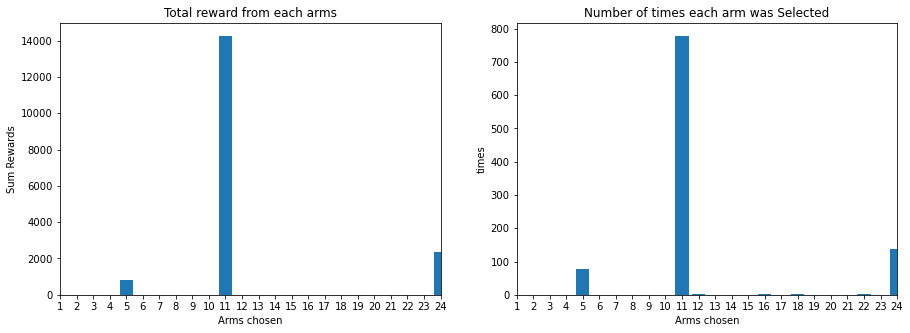

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.bar(range(1,25),sum_rewards)
plt.title("Total reward from each arms")
plt.xlabel('Arms chosen')
plt.ylabel('Sum Rewards')
plt.xticks(range(1,25))
plt.xlim(1,24)

plt.subplot(122)
plt.bar(range(1,25),Nt_a)
plt.title("Number of times each arm was Selected")
plt.xlabel('Arms chosen')
plt.ylabel('times')
plt.xticks(range(1,25))
plt.xlim(1,24)
plt.show()

In [12]:
avg = []
for i in range(len(sum_rewards)):
    if Nt_a[i] == 0:
        avg.append(0)
    else:
        avg.append(sum_rewards[i]/Nt_a[i])
print(avg)
regret = max(avg)*N-sum(sum_rewards)
print(regret)

[0, 0, 0, 0, 10.518987341772151, 0, 0, 0, 0, 0, 18.32776349614396, 6.0, 0, 0, 0, 15.0, 0, 5.0, 0, 0, 0, 3.0, 0, 16.971223021582734]
849.763496143958


In [13]:
# reward = pull('user7', 'XTkjktIc', 0)
# reward